In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Set up paths
CURRENT_DIR = Path().resolve()
EVAL_OUTPUT_DIR = CURRENT_DIR.parent / "evaluation_output"

# List of CSV files to load - add more files here as needed
CSV_FILES = [
    "evaluation_results_v1.csv",
    "evaluation_results_v2.csv",
    "evaluation_results_v3.csv",
]

# Columns to use
COLUMNS = [
    "question",
    "golden_answer",
    "agent_response",
    "evaluation_criteria",
    "correctness_score",
    "correctness_comment",
    "conciseness_score",
    "conciseness_comment",
    "hallucination_score",
    "hallucination_comment",
    "criteria_adherence_score",
    "criteria_adherence_comment"
]

# Load all CSV files
dfs = {}
for csv_file in CSV_FILES:
    csv_path = EVAL_OUTPUT_DIR / csv_file
    if csv_path.exists():
        df_name = csv_file.replace(".csv", "").replace("evaluation_results_", "")
        dfs[df_name] = pd.read_csv(csv_path)
        print(f"✓ Loaded {csv_file}: {dfs[df_name].shape[0]} rows, {dfs[df_name].shape[1]} columns")
    else:
        print(f"✗ File not found: {csv_file}")

print(f"\nTotal datasets loaded: {len(dfs)}")

# Display basic information about the first dataset
if dfs:
    first_key = list(dfs.keys())[0]
    print(f"\nColumns in {first_key}: {list(dfs[first_key].columns)}")
    print(f"\nFirst few rows of {first_key}:")
    dfs[first_key].head()


✓ Loaded evaluation_results_v1.csv: 20 rows, 12 columns
✓ Loaded evaluation_results_v2.csv: 20 rows, 12 columns
✓ Loaded evaluation_results_v3.csv: 20 rows, 12 columns

Total datasets loaded: 3

Columns in v1: ['question', 'golden_answer', 'agent_response', 'evaluation_criteria', 'correctness_score', 'correctness_comment', 'conciseness_score', 'conciseness_comment', 'hallucination_score', 'hallucination_comment', 'criteria_adherence_score', 'criteria_adherence_comment']

First few rows of v1:


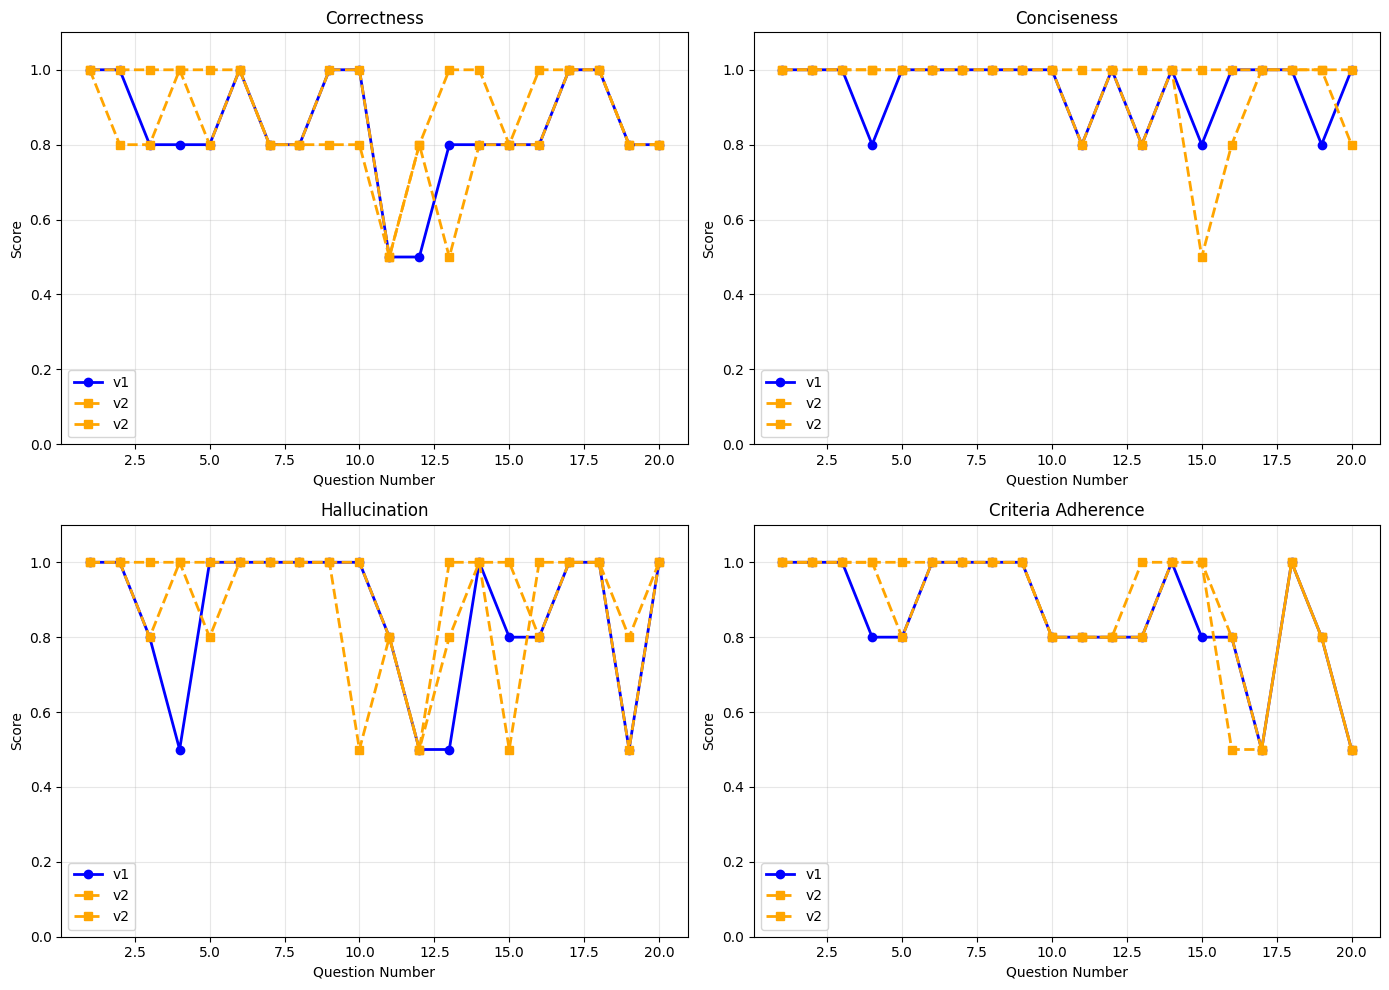


Average Scores Comparison:
------------------------------------------------------------

Correctness:
  v1: 0.840
  v2: 0.885
  v3: 0.850

Conciseness:
  v1: 0.950
  v2: 0.955
  v3: 0.980

Hallucination:
  v1: 0.860
  v2: 0.910
  v3: 0.895

Criteria Adherence:
  v1: 0.860
  v2: 0.900
  v3: 0.865


In [13]:
# Score columns to plot
score_columns = ['correctness_score', 'conciseness_score', 'hallucination_score', 'criteria_adherence_score']
score_names = ['Correctness', 'Conciseness', 'Hallucination', 'Criteria Adherence']

# Convert scores to numeric
for df_name, df in dfs.items():
    for col in score_columns:
        dfs[df_name][col] = pd.to_numeric(dfs[df_name][col], errors='coerce')

# Create 4 plots - one for each score
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each score
for i, score_col in enumerate(score_columns):
    ax = axes[i]
    
    # Plot v1 and v2
    for df_name, df in dfs.items():
        x = range(1, len(df) + 1)
        if df_name == 'v1':
            ax.plot(x, df[score_col], marker='o', label='v1', linewidth=2, color='blue')
        else:
            ax.plot(x, df[score_col], marker='s', label='v2', linewidth=2, color='orange', linestyle='--')
    
    ax.set_xlabel('Question Number')
    ax.set_ylabel('Score')
    ax.set_title(score_names[i])
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

# Show average scores
print("\nAverage Scores Comparison:")
print("-" * 60)
for i, score_col in enumerate(score_columns):
    print(f"\n{score_names[i]}:")
    for df_name, df in dfs.items():
        avg = df[score_col].mean()
        print(f"  {df_name}: {avg:.3f}")
